In [48]:
import io
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
%matplotlib inline

1.a. Read Data from the file

In [49]:
filename = "svar-set4.dat.txt"
r = io.open(filename, encoding='utf8').readlines()
X = []
Y = []
for i in r:
    if i.split()[0] != '#':
        tmp = i.split()
        X.append([float(tmp[o]) for o in range(len(tmp)-1)])
        Y.append([float(tmp[-1])])

# 1.a. Plotting the Data

In [50]:
def graph_plot(x,y,x_name,y_name,style):
    plt.plot(x,y,style)
    plt.xlabel(x_name)
    plt.ylabel(y_name)

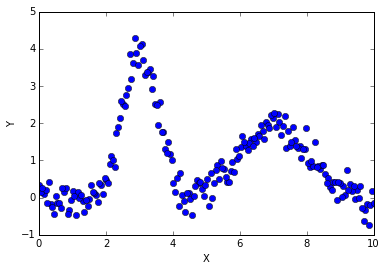

In [51]:
graph_plot(X,Y,"X","Y",'o')

# 1.b. Fit Linear Model

#### Function to Create Data Matrix

In [52]:
def create_data(data):
    z = data
    for j in z:
        j.insert(0,1)   
    return z

#### Function to Create Polynomial Data Martrix of degree n

In [53]:
def create_polynomial(data,degree):
    for i in range(2,degree+1):
        for j in data:
            j.insert(i,j[1]**i)
    return data

#### Function to find theta - Equivalent to fit function in Python

In [54]:
def find_theta(Data,Labels):
    return np.linalg.solve((np.dot(np.array(Data).transpose(),np.array(Data))),
                           (np.dot(np.array(Data).transpose(),np.array(Labels))))

In [55]:
def find_theta_linear(Data,Labels):
    x = []
    y = []
    x = [[len(Data),sum([i[0] for i in Data])],
        [sum([i[0] for i in Data]), sum([i[0]**2 for i in Data])]]
    y = [[sum([i[0] for i in Labels])], [sum([i[0]*j[0] for i,j in zip(Data,Labels)])]]
    return np.linalg.solve(np.array(x),np.array(y))

In [56]:
print "theta", find_theta_linear(X,Y)

theta [[ 0.99777523]
 [-0.00537298]]


#### Function to Predict unknown - Equivalent to predict function in Python

In [57]:
def predict(t,z):
    predictions = []
    for i in z:
        predictions.append(np.dot(t.transpose(),np.array(i)))
    return predictions

#### Function to find Mean Square Error

In [58]:
def mean_squrae_error(pred,y):
    return sum([(i-j)**2 for i,j in zip(pred,y)])/len(pred)
    

### Function to create n equals folds of index for cross validation

In [59]:
def fold_indices(size, folds):
    block_list = [size//folds for i in range(folds)]
    if size%folds != 0:
        for i in range(size%folds):
            block_list[i] += 1
    current = 0
    indices = []
    for x in block_list:
        m,n = current, current + x
        indices.append((m,n))
        current = n
    return indices

### Cross Validation for n folds using manualy created fit and predict functions; Finding the Training Error and Testing Error

In [60]:
def cross_validation(data,labels,folds):
    k_index = fold_indices(len(labels), folds)
    Theta_list = []
    training_MSE_list =[]
    testing_MSE_list = []
    for i in k_index:
        Z_test = data[i[0]:i[1]]
        Y_test = labels[i[0]:i[1]]
        Z_train = []
        Y_train = []
        for j in k_index:
            if i != j:
                Z_train = Z_train + data[j[0]:j[1]]
                Y_train = Y_train + labels[j[0]:j[1]]
        Theta  = find_theta(Z_train,Y_train)
        training_MSE = mean_squrae_error(predict(Theta,Z_train), Y_train)
        pred = predict(Theta,Z_test)
        MSE = mean_squrae_error(pred, Y_test)
        Theta_list.append(Theta)
        testing_MSE_list.append(MSE)
        training_MSE_list.append(training_MSE)
    return Theta_list, testing_MSE_list, training_MSE_list

In [61]:
Z= deepcopy(X)
Z = create_data(Z)
print Z[0:5],Y[0:5]

[[1, 3.969849246231156], [1, 5.778894472361809], [1, 6.78391959798995], [1, 9.49748743718593], [1, 3.467336683417086]] [[1.008692872827001], [0.9613524634187072], [2.044366731847647], [0.19929691650573], [2.511682986077576]]


### The Training and Testing Error for Linear Model

In [62]:
thetas,test_mse,training_mse = cross_validation(Z,Y,10)
print("The theta, Training Errot and Testing Error for Linear Model for 10 folds")
print("Theta\t\tTraining Error\tTesting Error")
for i in range(len(training_mse)):
    print "%f\t%f\t%f" %(thetas[i][1],training_mse[i],test_mse[i])
print "MSE Train Error Mean\tMSE Test Error Mean"
print np.mean(training_mse),"\t\t",np.mean(test_mse)

The theta, Training Errot and Testing Error for Linear Model for 10 folds
Theta		Training Error	Testing Error
0.006451	1.209249	1.137335
-0.012427	1.108694	2.036199
-0.016527	1.264240	0.641709
-0.000805	1.216254	1.063796
-0.007211	1.245234	0.803337
-0.008059	1.200808	1.205084
0.000858	1.211565	1.112232
-0.001026	1.199433	1.215086
-0.012328	1.203398	1.183639
-0.003151	1.143150	1.724455
MSE Train Error Mean	MSE Test Error Mean
1.20020250224 		1.21228704771


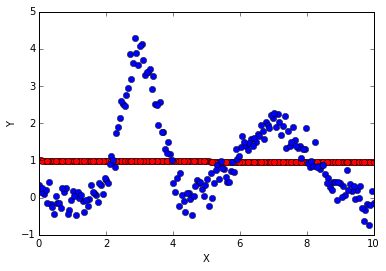

In [63]:
Y_predicted = predict(find_theta(Z,Y),Z)
#graph_plot(X,Y_predicted,"X","Y",'k-')
plt.plot(X,Y_predicted,'ro')
plt.plot(X,Y,'bo')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# 1.C. Compare results by Python Made functions

### Cross Validation for n folds using Python Linear Regression fit and predict functions; Finding the Training Error and Testing Error

In [64]:
def cross_validation_python(data,labels,folds):
    k_index = fold_indices(len(labels), folds)
    x = LinearRegression()
    Theta_list = []
    training_MSE_list =[]
    testing_MSE_list = []
    for i in k_index:
        Z_test = data[i[0]:i[1]]
        Y_test = labels[i[0]:i[1]]
        Z_train = []
        Y_train = []
        for j in k_index:
            if i != j:
                Z_train = Z_train + data[j[0]:j[1]]
                Y_train = Y_train + labels[j[0]:j[1]]
        x.fit(Z_train,Y_train)
        Theta_list.append(x.coef_)
        training_MSE = mean_squrae_error(x.predict(Z_train), Y_train)
        pred = x.predict(Z_test)
        MSE = mean_squrae_error(pred, Y_test)
        testing_MSE_list.append(MSE)
        training_MSE_list.append(training_MSE)
    return Theta_list, testing_MSE_list, training_MSE_list

In [65]:
thetas_py,test_mse_py,training_mse_py = cross_validation_python(Z,Y,10)
print("The theta, Training Errot and Testing Error for Linear Model for 10 folds")
print("Theta\t\tTraining Error\tTesting Error")
for i in range(len(training_mse)):
    print "%f\t%f\t%f" %(thetas_py[i][0][1],training_mse_py[i][0],test_mse_py[i][0])
print "Train Error Mean\tTest Error Mean"
print np.mean(training_mse_py),"\t\t",np.mean(test_mse_py)

The theta, Training Errot and Testing Error for Linear Model for 10 folds
Theta		Training Error	Testing Error
0.006451	1.209249	1.137335
-0.012427	1.108694	2.036199
-0.016527	1.264240	0.641709
-0.000805	1.216254	1.063796
-0.007211	1.245234	0.803337
-0.008059	1.200808	1.205084
0.000858	1.211565	1.112232
-0.001026	1.199433	1.215086
-0.012328	1.203398	1.183639
-0.003151	1.143150	1.724455
Train Error Mean	Test Error Mean
1.20020250224 		1.21228704771


### Polynomial models on different subset of data

In [66]:
Zpoly = create_polynomial(deepcopy(Z),2)
Zpoly2 = deepcopy(Z[:50])
Zpoly3 = deepcopy(Z[50:100])
Zpoly4 = deepcopy(Z[100:150])
Zpoly5 = deepcopy(Z[150:])
Zpoly2 = create_polynomial(Zpoly2,2)
Zpoly3 = create_polynomial(Zpoly3,3)
Zpoly4 = create_polynomial(Zpoly4,4)
Zpoly5 = create_polynomial(Zpoly5,5)

In [67]:
thetas_Zpoly2,test_mse_Zploy2,training_mse_Zpoly2 = cross_validation(Zpoly2,Y[:50],10)
print("The theta, Training Errot and Testing Error for Polynomial Model with degree 2 for 10 folds")
print("Theta\t\t\tTraining Error\tTesting Error")
for i in range(len(training_mse)):
    print thetas_Zpoly2[i] ,"\t%f\t\t%f" %(training_mse_Zpoly2[i][0],test_mse_Zploy2[i][0])
print "Train Error Mean\tTest Error Mean"
print np.mean(training_mse_Zpoly2),"\t\t",np.mean(test_mse_Zploy2)

The theta, Training Errot and Testing Error for Polynomial Model with degree 2 for 10 folds
Theta			Training Error	Testing Error
[[ 0.06414225]
 [ 0.61204143]
 [-0.06334695]] 	1.169246		0.449485
[[ 0.05540365]
 [ 0.6381406 ]
 [-0.06625218]] 	1.205255		0.125646
[[-0.03615247]
 [ 0.64076165]
 [-0.06466117]] 	0.946527		2.476740
[[ 0.03719172]
 [ 0.61220159]
 [-0.06310654]] 	1.196349		0.216129
[[ 0.14006636]
 [ 0.65244171]
 [-0.06874571]] 	1.100221		1.160447
[[ 0.2058848 ]
 [ 0.53987236]
 [-0.05670055]] 	1.000890		2.001801
[[ 0.0444531 ]
 [ 0.58341564]
 [-0.05929906]] 	0.945012		2.510818
[[ 0.11689424]
 [ 0.60526209]
 [-0.06291227]] 	1.085675		1.202856
[[ 0.04890627]
 [ 0.63175781]
 [-0.06537339]] 	1.160549		0.525199
[[ 0.02570505]
 [ 0.68029193]
 [-0.07066691]] 	1.132374		0.820087
Train Error Mean	Test Error Mean
1.09420984139 		1.14892091518


In [68]:
thetas_Zpoly3,test_mse_Zploy3,training_mse_Zpoly3 = cross_validation(Zpoly3,Y[50:100],10)
print("The theta, Training Errot and Testing Error for Linear Model for 10 folds")
print("Theta\t\t\tTraining Error\tTesting Error")
for i in range(len(training_mse)):
    print thetas_Zpoly3[i] ,"\t%f\t\t%f" %(training_mse_Zpoly3[i][0],test_mse_Zploy3[i][0])
print "Train Error Mean\tTest Error Mean"
print np.mean(training_mse_Zpoly3),"\t\t",np.mean(test_mse_Zploy3)

The theta, Training Errot and Testing Error for Linear Model for 10 folds
Theta			Training Error	Testing Error
[[-0.14166505]
 [ 0.43341213]
 [-0.0074951 ]
 [-0.00376824]] 	0.657453		0.535293
[[-0.1200791 ]
 [ 0.4426595 ]
 [-0.01380777]
 [-0.00327784]] 	0.637728		0.724535
[[ 0.18970454]
 [ 0.00766145]
 [ 0.08398531]
 [-0.00904764]] 	0.629979		0.841216
[[ 0.02347855]
 [ 0.14274644]
 [ 0.05014762]
 [-0.00654642]] 	0.547902		1.636250
[[-0.12827797]
 [ 0.40945951]
 [-0.00196969]
 [-0.00412516]] 	0.647148		0.617013
[[-0.13013208]
 [ 0.37880222]
 [ 0.00626051]
 [-0.0045988 ]] 	0.676621		0.334616
[[-0.13988257]
 [ 0.39508877]
 [ 0.00404986]
 [-0.00451482]] 	0.676814		0.350828
[[-0.04052488]
 [ 0.27821252]
 [ 0.02281322]
 [-0.00529708]] 	0.695905		0.154977
[[ 0.03678144]
 [-0.02676109]
 [ 0.10655884]
 [-0.01091056]] 	0.534814		1.829551
[[-0.14927744]
 [ 0.4469463 ]
 [-0.0118672 ]
 [-0.00345627]] 	0.638095		0.710145
Train Error Mean	Test Error Mean
0.634245948089 		0.773442475168


In [69]:
thetas_Zpoly4,test_mse_Zploy4,training_mse_Zpoly4 = cross_validation(Zpoly4,Y[100:150],10)
print("The theta, Training Errot and Testing Error for Linear Model for 10 folds")
print("Theta\t\t\tTraining Error\tTesting Error")
for i in range(len(training_mse)):
    print thetas_Zpoly4[i] ,"\t%f\t\t%f" %(training_mse_Zpoly4[i][0],test_mse_Zploy4[i][0])
print "Train Error Mean\tTest Error Mean"
print np.mean(training_mse_Zpoly4),"\t\t",np.mean(test_mse_Zploy4)

The theta, Training Errot and Testing Error for Linear Model for 10 folds
Theta			Training Error	Testing Error
[[-1.48305622]
 [ 2.76586353]
 [-0.92830912]
 [ 0.12594938]
 [-0.00601457]] 	0.618143		1.279163
[[-3.14141629]
 [ 4.79461124]
 [-1.55508788]
 [ 0.20052459]
 [-0.00908714]] 	0.558981		2.494164
[[-1.44451565]
 [ 2.71165886]
 [-0.92715101]
 [ 0.12930697]
 [-0.00634146]] 	0.662379		0.915992
[[-1.65126461]
 [ 3.09912885]
 [-1.03787305]
 [ 0.1394593 ]
 [-0.00658308]] 	0.728536		0.262774
[[-1.64934606]
 [ 2.93928053]
 [-0.9516502 ]
 [ 0.12467899]
 [-0.00580146]] 	0.725219		0.280781
[[-1.71940498]
 [ 3.02046982]
 [-0.963776  ]
 [ 0.12593625]
 [-0.00590499]] 	0.684018		0.702583
[[-1.15305162]
 [ 2.0253624 ]
 [-0.66362304]
 [ 0.09302575]
 [-0.00465478]] 	0.527329		2.411185
[[-1.63992255]
 [ 3.02488747]
 [-0.98962392]
 [ 0.13039346]
 [-0.00608598]] 	0.717023		0.355825
[[-1.63732157]
 [ 2.9254465 ]
 [-0.96360889]
 [ 0.12913136]
 [-0.00612407]] 	0.749015		0.054552
[[-1.5710933 ]
 [ 2.95663

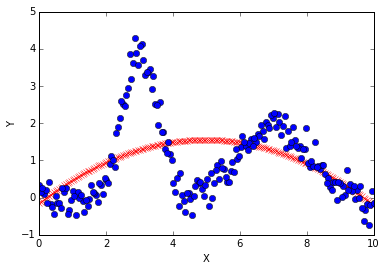

In [70]:
Y_predicted_poly2 = predict(find_theta(Zpoly,Y),Zpoly)
plt.plot(X,Y_predicted_poly2,'rx')
plt.plot(X,Y,'bo')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [71]:
thetas_Zpoly5,test_mse_Zploy5,training_mse_Zpoly5 = cross_validation(Zpoly5,Y[150:],10)
print("The theta, Training Errot and Testing Error for Linear Model for 10 folds")
print("Theta\t\t\tTraining Error\tTesting Error")
for i in range(len(training_mse)):
    print thetas_Zpoly5[i] ,"\t%f\t\t%f" %(training_mse_Zpoly5[i][0],test_mse_Zploy5[i][0])
print "Train Error Mean\tTest Error Mean"
print np.mean(training_mse_Zpoly5),"\t\t",np.mean(test_mse_Zploy5)

The theta, Training Errot and Testing Error for Linear Model for 10 folds
Theta			Training Error	Testing Error
[[-0.50699986]
 [ 0.03287504]
 [ 1.09854147]
 [-0.41265829]
 [ 0.05312594]
 [-0.00229245]] 	0.971835		0.178505
[[-0.30622861]
 [-0.34236712]
 [ 1.29609917]
 [-0.45437888]
 [ 0.05700906]
 [-0.0024283 ]] 	0.814465		1.559265
[[-0.52460483]
 [ 0.34937235]
 [ 0.88371094]
 [-0.36233325]
 [ 0.04835013]
 [-0.00213788]] 	0.891022		0.863791
[[-0.26250726]
 [-0.5341544 ]
 [ 1.46234062]
 [-0.50225362]
 [ 0.06268474]
 [-0.00266545]] 	0.890998		0.899886
[[-1.40093562]
 [ 1.64994575]
 [ 0.28399191]
 [-0.24392944]
 [ 0.03771317]
 [-0.00177869]] 	0.915101		0.912757
[[-0.53310318]
 [ 0.44762675]
 [ 0.84551099]
 [-0.35924061]
 [ 0.04841759]
 [-0.00214678]] 	0.894595		0.875235
[[-0.16076471]
 [-0.80060724]
 [ 1.64975466]
 [-0.56651337]
 [ 0.07217294]
 [-0.00314635]] 	0.766311		2.648279
[[-0.46040124]
 [ 0.29802824]
 [ 0.93524887]
 [-0.37808536]
 [ 0.05005038]
 [-0.002197  ]] 	0.913261		0.694511
[

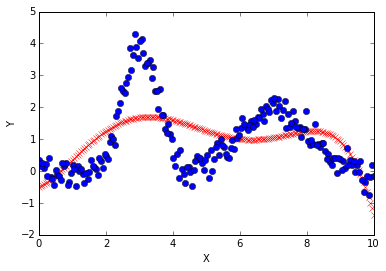

In [72]:
Zpoly_5 = create_polynomial(deepcopy(Z),5)
Y_predicted_poly5 = predict(find_theta(Zpoly_5,Y),Zpoly_5)
plt.plot(X,Y_predicted_poly5,'rx')
plt.plot(X,Y,'bo')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# 1.d Reduce the size of data and evaluate performance

In [73]:
test_size = int(0.1 *len(X))
test_idx = len(Z) -test_size
Z_new_test = Z[test_idx:]
Y_new_test = Y[test_idx:]
train_size = [90,75,50,25]
Z_train_new = {}
Y_train_new = {}
for i in train_size:
    train_idx = int((i*1.0/100)*len(Z))
    Z_train_new[i] = Z[0:train_idx]
    Y_train_new[i] = Y[0:train_idx]
    

In [74]:
def analysis(train,knownl,test,unknownl):
    predict_reduced = {}
    MSE_reduced ={}
    for i in train:
        predict_reduced[i] = predict(find_theta(train[i],knownl[i]),test)
        MSE_reduced[i] = mean_squrae_error(predict_reduced[i],unknownl)
    return predict_reduced,MSE_reduced

In [75]:
new_predict,new_MSE = analysis(Z_train_new,Y_train_new,Z_new_test,Y_new_test)

In [76]:
print "Mean error when the training data is some percentage of original data "
print "Percentage\tMean_Error"
for i in new_MSE:
    print i,"\t\t",np.mean(new_MSE[i])

Mean error when the training data is some percentage of original data 
Percentage	Mean_Error
25 		1.70496717318
90 		1.72445473762
75 		1.74098476595
50 		1.74379150188
